In [1]:
import sys
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

warnings.filterwarnings('ignore')
givenDec = lambda gdVal: float('%.1f' % gdVal)

In [2]:
def PrintDistMat(gDistMat):
    for i in range(len(gDistMat)):
        for j in range(len(gDistMat[0])):
            sys.stdout.write(str(givenDec(gDistMat[i][j])) + '\t')
        sys.stdout.write('\n')

In [3]:
data = pd.read_csv("mall_customers.csv")
data.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.shape

(200, 5)

In [5]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

#### There are no missing values in the dataset

In [6]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Convert Categorical feature into numerical feature
data['Genre'] = data['Genre'].astype('category').cat.codes

In [8]:
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
#convert dataframe to matrix
mat = data.values
mat

array([[  1,   1,  19,  15,  39],
       [  2,   1,  21,  15,  81],
       [  3,   0,  20,  16,   6],
       [  4,   0,  23,  16,  77],
       [  5,   0,  31,  17,  40],
       [  6,   0,  22,  17,  76],
       [  7,   0,  35,  18,   6],
       [  8,   0,  23,  18,  94],
       [  9,   1,  64,  19,   3],
       [ 10,   0,  30,  19,  72],
       [ 11,   1,  67,  19,  14],
       [ 12,   0,  35,  19,  99],
       [ 13,   0,  58,  20,  15],
       [ 14,   0,  24,  20,  77],
       [ 15,   1,  37,  20,  13],
       [ 16,   1,  22,  20,  79],
       [ 17,   0,  35,  21,  35],
       [ 18,   1,  20,  21,  66],
       [ 19,   1,  52,  23,  29],
       [ 20,   0,  35,  23,  98],
       [ 21,   1,  35,  24,  35],
       [ 22,   1,  25,  24,  73],
       [ 23,   0,  46,  25,   5],
       [ 24,   1,  31,  25,  73],
       [ 25,   0,  54,  28,  14],
       [ 26,   1,  29,  28,  82],
       [ 27,   0,  45,  28,  32],
       [ 28,   1,  35,  28,  61],
       [ 29,   0,  40,  29,  31],
       [ 30,  

In [10]:
norm_mat = StandardScaler().fit_transform(mat)
norm_mat

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [11]:
#Computing manhattan distance between data points
dist_mat = manhattan_distances(norm_mat)
PrintDistMat(dist_mat)

0.0	1.8	3.4	3.9	3.1	3.8	4.7	4.7	4.9	4.4	4.7	5.8	6.1	4.3	2.7	2.2	3.8	1.6	3.4	6.1	2.0	2.5	6.0	3.0	6.4	3.3	5.1	3.0	4.9	5.2	5.4	4.6	5.0	3.4	6.4	5.1	5.9	5.5	5.2	5.0	7.0	4.0	3.8	5.4	6.3	5.1	6.6	4.7	4.6	4.8	6.6	3.7	5.4	5.7	6.5	4.1	6.8	6.0	5.2	4.9	6.5	2.9	8.3	7.6	6.0	3.2	6.6	8.3	3.2	5.7	6.8	6.7	7.9	8.2	6.0	3.9	7.2	4.7	5.6	7.1	6.1	4.9	6.4	7.1	5.8	5.3	8.4	6.0	7.1	7.7	9.4	3.4	5.8	6.9	6.4	4.2	7.7	6.4	5.7	3.9	5.9	8.1	7.8	4.7	6.4	5.9	9.5	6.5	7.4	7.4	7.5	6.4	7.3	4.1	6.3	6.3	9.2	8.9	8.5	9.0	5.3	7.5	8.4	7.6	6.9	8.6	6.2	8.0	8.3	7.1	7.6	7.2	7.1	8.6	5.9	9.2	9.6	6.8	5.8	9.1	10.8	7.8	7.5	9.6	6.3	7.8	7.1	9.2	8.7	8.0	7.6	8.4	9.6	9.9	10.0	9.6	7.9	9.4	7.7	9.3	10.0	9.7	6.6	10.3	8.2	10.2	8.0	10.8	9.4	7.5	8.2	7.8	8.1	9.0	11.2	10.4	9.6	7.6	9.9	9.2	9.8	11.0	9.2	11.0	10.0	9.5	11.6	8.3	11.1	11.7	10.4	10.8	9.3	12.5	12.3	12.1	11.9	9.9	9.8	10.6	
1.8	0.0	5.1	2.4	4.5	2.4	6.1	2.9	6.4	3.3	6.2	4.0	7.6	2.8	4.2	0.6	5.3	1.2	4.8	4.3	3.5	1.3	7.5	1.8	7.9	1.5	6.6	2.7	6.3	3.4	6.9	3.4	6.5	1.9	7.9	3.3	7.3	4.3	6.7	3.8	8.5	2.2	5.3	5.2	7.

In [12]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(dist_mat)
    wcss.append(model.inertia_)

In [13]:
wcss

[197568.41265825357,
 135723.82499977184,
 109095.34481349883,
 90752.5971128495,
 75234.62579981376,
 66135.32738222495,
 58842.66208656615,
 54008.88106256735,
 47141.435592234106,
 41717.455562455965]

#### Performing the Elbow method to find the optimal number of clusters for k-means and then using the optimal number of clusters to perform k-means clustering using Manhattan distance.

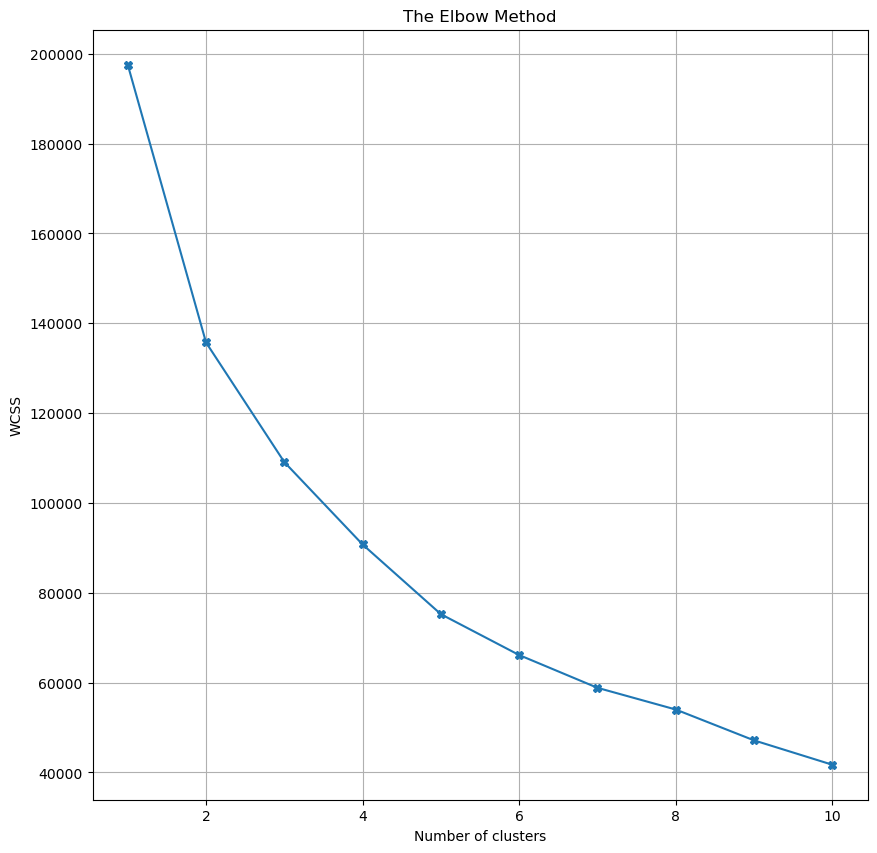

In [14]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='X')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.grid()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(dist_mat)

KMeans(n_clusters=5)

In [16]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 0, 0, 3, 4, 4, 4, 4, 4,
       0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0,
       0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0,
       4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 4])

#### Adding a new column 'Labels' and assigning the corresponding cluster number

In [17]:
data['Labels'] = labels

In [18]:
data.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
5,6,0,22,17,76,2
6,7,0,35,18,6,2
7,8,0,23,18,94,2
8,9,1,64,19,3,2
9,10,0,30,19,72,2


#### Splitting the dataset into train and test sets and performing the standard classification tasks

In [19]:
X = data.drop('Labels', axis=1)
Y = data['Labels']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [21]:
X_train.shape

(120, 5)

In [22]:
Y_train.shape

(120,)

In [23]:
X_test.shape

(80, 5)

In [24]:
Y_test.shape

(80,)

### Since each customer belongs to one and only one label, it's a multi-class classification and we'll be applying all the classification tasks according to this assumption.

#### Logistic Regression

In [25]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [26]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [27]:
Y_pred = lr.predict(X_test)

In [28]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[19  0  0  0  0]
 [ 3 16  2  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  9  2]
 [ 0  0  0  1 15]]


In [29]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.76      0.86        21
           2       0.87      1.00      0.93        13
           3       0.90      0.82      0.86        11
           4       0.88      0.94      0.91        16

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.90      0.90        80



#### Decision Tree

In [30]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
dt_pred_test = dt.predict(X_test)

In [32]:
dt_pred_train = dt.predict(X_train)

In [33]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy_score(Y_test, dt_pred_test)))

Accuracy of Decision Tree classifier on test set: 0.95


In [34]:
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train, average='micro'))

Training Set Evaluation F1-Score=> 1.0


In [35]:
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test, average='micro'))

Testing Set Evaluation F1-Score=> 0.9500000000000001


#### Random Forest

In [36]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [37]:
rf_pred_test = rf.predict(X_test)

In [38]:
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test, rf_pred_test, average='micro'))

Testing Set Evaluation F1-Score=> 0.9625000000000001


In [39]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(Y_test, rf_pred_test)))

Accuracy of Random Forest classifier on test set: 0.96


#### Naive Bayes 

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [41]:
gnb_pred = gnb.predict(X_test)

In [42]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, gnb_pred)))

Model accuracy score: 0.9750


In [43]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

Training set score: 0.9667
Test set score: 0.9750


In [44]:
print(classification_report(Y_test, gnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        13
           3       1.00      0.91      0.95        11
           4       0.94      1.00      0.97        16

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



#### Observation:
<li> Of all the algorithms, Naives Bayes has given the highest model accuracy of 97% whereas Logistic Regression has given the lowest model accuracy of 90%</li>
<li> Random Forest and Decision Tree almost provided the same accuracy of 96% and 95%</li>
<li> By looking at the confusion matrix, we can see for each label the FP and FN are comparatively very less compared to TP and TN through which we can say that in most of the cases the clusters are labeled correctly and it is making sense. The same can be concluded through the higher values of precision and recall or F1-score</li>